In [4]:
import matplotlib.pyplot as plt
import rng
import numpy as np
import math

### Gaussian distribution

Exmaple of a $\mathcal{N}(0, 1)$ simulation using Metropolis-Hastings

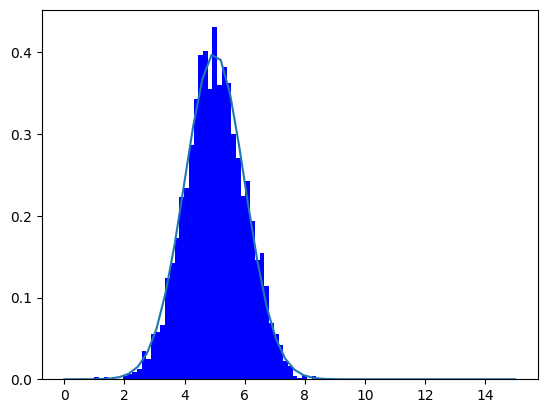

In [5]:
def gaussian_density(x):
    mu, sigma = 5, 1 # mean and standard deviation
    num = math.exp(-(x - mu) ** 2 / (2.0 * sigma ** 2))
    normalization = math.sqrt(2 * math.pi * sigma ** 2)
    return  num / normalization

sample, ratio = rng.mcmc(gaussian_density)

x_array = np.linspace(0, 15.0, 50)
y_array = np.asarray([gaussian_density(x) for x in x_array])

plt.plot(x_array,y_array)
_ = plt.hist(sample, density=True, bins=50, color='b')

### Exponential distribution

Acceptance ratio: 33.78%


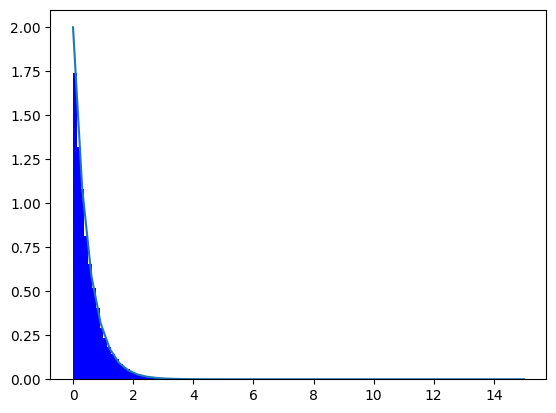

In [6]:
def exponential_density(x):
    lamb = 2
    if x < 0:
        return 0
    else:
        return lamb * math.exp(-lamb * x)
    
sample, ratio = rng.mcmc(exponential_density, size=100_000)
print(f"Acceptance ratio: {ratio * 100:.2f}%")

x_array = np.linspace(0, 15.0, 50)
y_array = np.asarray([exponential_density(x) for x in x_array])

plt.plot(x_array,y_array)
_ = plt.hist(sample, density=True, bins=50, color='b')

### Gamma distribution

Acceptance ratio: 83.17%


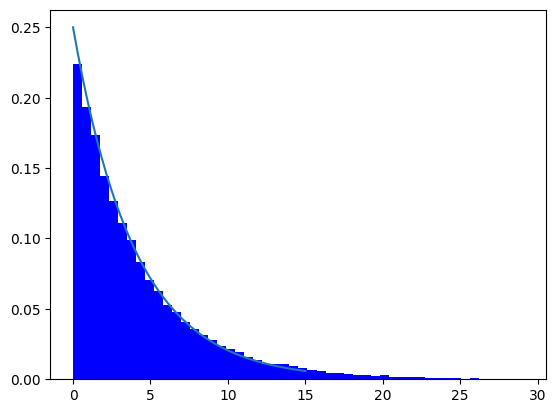

In [7]:
def gamma_density(x):
    k, theta = 1 , 4
    if x < 0:
        return 0
    else:
        return ((pow(x, k - 1) * math.exp(-x / theta)) / (pow(theta, k) * math.gamma(k)))
    
sample, ratio = rng.mcmc(gamma_density, size=100_000)
print(f"Acceptance ratio: {ratio * 100:.2f}%")

x_array = np.linspace(0, 15.0, 50)
y_array = np.asarray([gamma_density(x) for x in x_array])

plt.plot(x_array,y_array)
_ = plt.hist(sample, density=True, bins=50, color='b')

As we increase the variance in the Metropolis Hasting algorithm, the autocorrelation of the time series decreases, but as the variance increase the acceptance ratio decrease aswell.

There is a trade-off between low autocorrelation and good acceptance ratio.

In the literature a good acceptance ratio is around 0.25.

Note that the law for generate a candidate has an impact aswell; some candidate can be better for specific target laws and worst for others

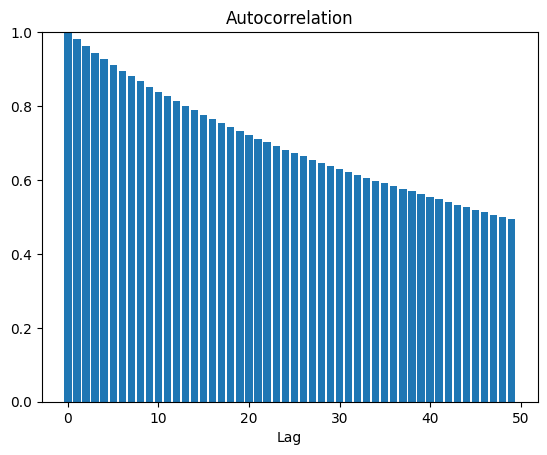

In [8]:
autocorrel = rng.autocorrelation(sample)

plt.figure()
plt.bar(range(len(autocorrel)), autocorrel)
plt.ylim(0, 1)
plt.title("Autocorrelation")
plt.xlabel("Lag")
plt.show()


Acceptance ratio: 28.64%


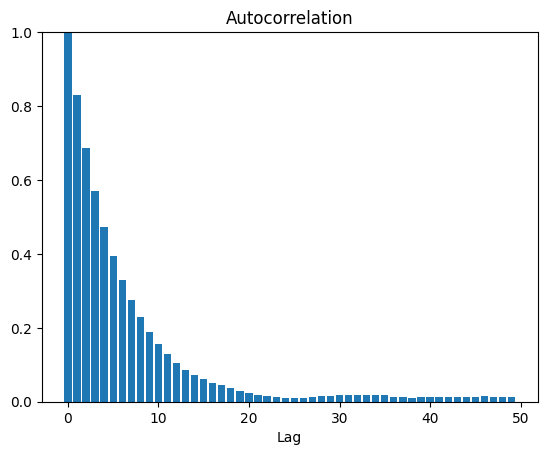

In [9]:
sample, ratio = rng.mcmc(gamma_density, sigma=10, size=100_000)
print(f"Acceptance ratio: {ratio * 100:.2f}%")

autocorrel = rng.autocorrelation(sample)

plt.figure()
plt.bar(range(len(autocorrel)), autocorrel)
plt.ylim(0, 1)
plt.title("Autocorrelation")
plt.xlabel("Lag")
plt.show()

For example, compare to the inigial gamma simulation($\sigma = 1$), using $\sigma = 10$ gives a decent acceptance ratio and a fast decreasing auto-corelation and sounds like a good value to generate samples